# Feature Engineering


The following tutorial contains examples of Python code for feature engineering. 
You should refer to the "Feature Engineering" Lecture Note in Week 6.

Read the step-by-step instructions below carefully. 
To execute the code, click on the cell and press the SHIFT-ENTER keys simultaneously.

## 1. Feature Selection - Univariate feature selection

Recall the iris dataset has four features and one class:

- feature 1: sepal length in centimeters

- feature 2: sepal width in centimeters

- feature 3: petal length in centimeters

- feature 4: petal width in centimeters

- class (Setosa, Versicolour, Virginica) 

In this tutorial, you will learn how to:

- Conduct univariate feature selection algorithm.  进行单变量特征选择算法。


- Conduct recursive feature elimination algorithm. 进行递归特征消除算法。


- Conduct PCA feature reduction algorithm.  进行PCA特征减少算法。


### **1.0** *Univariate Feature Selection.* 
### Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.  

单变量特征选择的工作原理是根据单变量统计检验选择最佳特征。它可以看作是估计器的预处理步骤。

Source_link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html 

If you want to learn more about the Univariate Feature Selection models, please go to the source link:
https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection 

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. 

SelectKBest removes all but the top K highest scoring features

**<font color='red'>Code:</font>** The following code identify the algorithm SelectKBest from sklearn library.

In [45]:
from sklearn.feature_selection import SelectKBest   #the "SelectKBest" removes all but the top K highest scoring features
from sklearn.feature_selection import chi2,f_classif 
# these are two selection criterias
# the "f_classif" Computes the ANOVA F-value for the provided sample.  “f_classif”计算所提供样本的方差分析 F 值
# the "chi2" computes chi-squared stats between each non-negative feature and class. “chi2”计算每个非负特征和类之间的卡方统计量
import pandas as pd

### 1.1 Load your Raw Data

**<font color="red">Code:</font>**

In [46]:
iris = pd.read_csv('iris.txt',header=None)   #we load the data but the data does not have table head 没有表头
iris.columns=['sepal-L','sepal-W','petal-L','petal-W','class'] #so we set the column names as this list of texts. 
#you may try removing this "iris.columns" and see. what you can get.

iris#you get a dataset of 150 objects and 4 features

,sepal-L,sepal-W,petal-L,petal-W,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 1.2 Identify your features and target

In [47]:
features=['sepal-L','sepal-W','petal-L','petal-W']  #here we set a feature list to be selected from the data table 
target=['class'] # the column "class" will be selected as the target variable.
X=iris[features] # using this code, we define a variable "X" to store the feature set. 
#Please note the "feature" in "iris[feature]" represents the feature definded in the first row. 
#"features=['sepal-L','sepal-W','petal-L','petal-W']"

y=iris[target] # similar to getting "X", we get the "y" from the target column ("class")
display(X)

,sepal-L,sepal-W,petal-L,petal-W
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


这段代码使用seaborn库创建一个pair plot，它是Seaborn库中的一种函数，用于创建一种图表，显示数据集中每对变量之间的关系，通常用于探索数据集中的变量之间的关系和分布，并且可以提供有关变量之间的潜在相互作用的洞察力。它生成了一个矩阵，其中每个单元格都包含变量之间的散点图、直方图或核密度图等

在Pair plot中，对角线上通常是单变量的分布图，而其他单元格则是两个变量之间的散点图、回归线、核密度估计等。此外，Pair plot还可以使用不同颜色的标记来区分分类变量

代码通过传递“iris”数据集作为第一个参数来指定要可视化的数据集。第二个参数“hue”用于指定要着色的变量，这里是“class”变量，即花的种类，这将导致散点图的颜色根据花的种类而变化

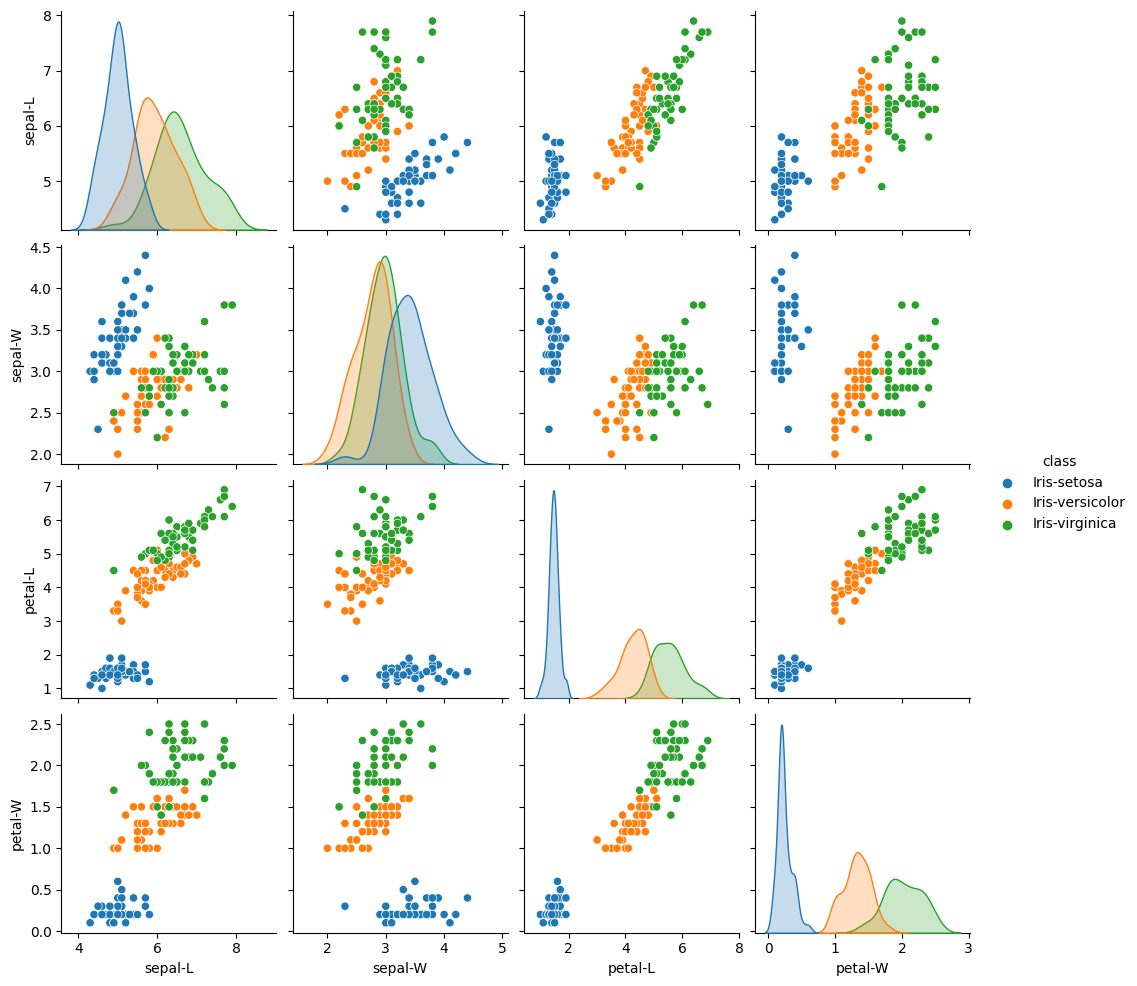

In [48]:
import seaborn as sns

sns.pairplot(iris, hue="class")

### 1.3 select the TWO most representative features from the 4 features using measurement Chi2. The *SelectKBest* is the algorithm you pick from the library.
The *chi2* is the measurement, you can change it to *f_classif* (ANOVA f-value).
The *k=2* is the number of optimal features you select from the complete set.


**<font color="red">Code:</font>**

这段代码的作用是使用特征选择器"my_model"来对数据集进行特征选择，并将选择后的特征存储在"X_new"变量中

第一行代码：创建了一个名为"my_model"的特征选择器，使用的是Scikit-learn库中的SelectKBest类，并将卡方检验作为特征选择方法，并选择最重要的两个特征。该代码指定了以下参数：

"chi2"是用于计算特征重要性的函数，即卡方检验。在特征选择过程中，卡方检验可用于确定每个特征与目标变量之间的相关性程度。

"k=2"指定要选择的最重要的特征数量，即选择与目标变量相关性最强的两个特征。在此示例中，选择最重要的两个特征可能是为了将特征数量降到一个较小的数量，以便在后续建模过程中更有效地处理数据。

第二行代码：使用fit_transform方法将原始特征矩阵X转换为仅包含SelectKBest选定的前2个特征的新特征矩阵X_new

In [49]:
#Step 1: define a feature selection model and specify the parameters
my_model=SelectKBest(chi2, k=2)   #you can see this model has two critical parameters: 
# "chi2" is used to determine the selection criteria, you can change it to "f_classif";
# "k=2" indicates how many features will be selected.

#Step 2: use the model to fit the data and transform the feature set "X" to a new selected feature "X_new"
X_new=my_model.fit_transform(X,y) 

X_new.shape # you get a new feature set of dimension k=2

(150, 2)

### 1.4 Check the selected features

For detailed numpy array operation:
https://numpy.org/doc/stable/reference/generated/numpy.array.html 

In [50]:
display(X_new[0:5,:])  # this code display the first five rows and all columns of X_new

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

## 2. Feature Selection - use Wrapper model to measure feature importance

**1.** Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. 

给定一个为特征分配权重的外部估计器（例如，线性模型的系数），递归特征消除 （RFE） 是通过递归考虑越来越小的特征集来选择特征。首先，根据初始特征集对估计器进行训练，并通过coef_属性或通过feature_importances_属性获得每个特征的重要性。然后，从当前特征集中修剪最不重要的特征。该过程在修剪后的集上递归重复，直到最终达到要选择的所需特征数。

**<font color="red">Code:</font>** The following code identify the algorithm SelectFromModel from sklearn library. This is a kind of Wrapper model. The algorithm select for feature importance measurement is ExtraTreesClassifier.

Please read the documentation here:
https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model 

In [51]:
from sklearn.ensemble import ExtraTreesClassifier  # "ExtraTreesClassifier" is a learning model from library "ensemble"
# We will learn this model in the section of classification. It is used for data classification.

from sklearn.feature_selection import SelectFromModel # "SelectFromModel" is the wrapper model we are going to learn.

### 2.1 We will generate the dataset

**<font color="red">Code:</font>**

In [52]:
iris = pd.read_csv('iris.txt',header=None) # Now we are repeating the same step. Please check 1.2 for details
iris.columns=['sepal-L','sepal-W','petal-L','petal-W','class']
features=['sepal-L','sepal-W','petal-L','petal-W']
target=['class']
X=iris[features]
y=iris[target]
X=X.values
y=y.values.ravel()  #please note y is a one-dimensional data, we need to use ravel() to reshape it to (n,)
#You may try removing this "ravel()" and see what will happen.
#Details: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

y = y.values.ravel()将 pandas DataFrame 类型的 y 转换为一维 numpy 数组。

具体而言，values 属性将 y 转换为 numpy 数组，然后 ravel() 方法将其展平为一维数组。这样做的目的通常是为了与 scikit-learn 中的某些函数和类（例如某些分类器）兼容，因为它们通常需要接受一维数组作为输入，而不是 pandas DataFrame 或 Series。

In [53]:
y.shape

(150,)

当调用 y.shape 时，它将返回一个元组，其中包含两个数字，分别表示数组 y 的行数和列数。如果数组是一维的，则返回一个元组 (n,)，其中 n 表示数组的长度（也就是元素个数），因为它只有一维。

在这种情况下，由于 y 是一维数组，因此它的 shape 属性返回的是一个只包含一个数字的元组 (n,)，其中 n 是数组的长度。逗号只是元组语法的一部分，用于表示元组只有一个元素。因此，只有逗号前的一个数字是数组的长度，也就是 y 中的元素个数。

### 2.2 We identify a classifier and use the classifier to measure feature importance

我们识别一个分类器并使用分类器来衡量特征重要性

这段代码使用 scikit-learn 中的 ExtraTreesClassifier 类，创建了一个包含50个决策树的随机森林模型，并将其拟合到输入数据集 X 和目标变量 y 上。

ExtraTreesClassifier 类是一种基于随机森林的分类器，它会对数据进行随机子采样，并在每个决策树中随机选择特征进行划分。这种随机性使得模型具有较好的泛化能力，可以有效地避免过拟合。

在模型训练完成后，feature_importances_ 属性可以用来获取每个特征对模型的重要性评分。这些得分是根据模型中所有决策树的特征重要性得分的平均值计算得出的。特征重要性得分表示在构建随机森林时每个特征对模型的性能有多大的影响。重要性得分越高，说明该特征在分类任务中具有更高的预测能力。

In [54]:
clf = ExtraTreesClassifier(n_estimators=50) #get the model from library.
#this is the learning model that you will use to evaluate the importance of different features.
# 创建了一个 ExtraTreesClassifier 类的实例，并将其赋值给变量 clf。
# ExtraTreesClassifier 是一种基于随机森林的分类器，其中 n_estimators=50 表示要构建的决策树数量为 50

clf = clf.fit(X,y) #fit your data.  X 是训练数据集的特征矩阵，y 是训练数据集的标签向量

clf.feature_importances_ # now we can get the feature importance score from model
#please note this is the relative feature importance based on how accurate the learning model is.
# 使用 clf.feature_importances_ 属性获取训练后模型中各特征的重要性得分。
# 这些得分表示在构建随机森林时每个特征对模型的性能有多大的影响。重要性得分越高，说明该特征在分类任务中具有更高的预测能力。
# 此代码将这些得分存储在 clf.feature_importances_ 中，并可以打印或进一步处理。

array([0.11635679, 0.06429709, 0.3826854 , 0.43666073])

这个结果表示模型中每个特征的重要性得分。具体来说，这是一个包含四个数字的一维 numpy 数组，每个数字对应模型中对应特征的重要性得分。

在这个例子中，clf.feature_importances_ 的输出是 array([0.05883465, 0.05291819, 0.37775813, 0.51048903])。这表示有四个特征，每个特征的得分如下：

第一个特征的得分为 0.05883465；
第二个特征的得分为 0.05291819；
第三个特征的得分为 0.37775813；
第四个特征的得分为 0.51048903。

第四个特征的得分最高，说明该特征在分类任务中具有较高的预测能力，而第一、二个特征的得分相对较低

### 2.3 select your feature subset from SelectFromModel

reference: https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model 

**<font color="red">Code:</font>**

这段代码使用了 SelectFromModel 类来选择特征，从而构建一个新的特征矩阵

第一行：使用 SelectFromModel 类创建了一个新的特征选择器。

clf 是我们之前训练好的模型，prefit=True 表示我们将使用预训练模型中的特征重要性得分来进行特征选择。这个类的主要作用是根据所提供的阈值从预训练模型中选择重要性得分高于阈值的特征。阈值可以通过类的 threshold 参数设置，默认为 'mean'。如果设置为 'median'，则将选择所有重要性得分高于中位数的特征。

第二行：将特征选择器应用于特征矩阵 X，并创建一个新的特征矩阵 X_new。该矩阵仅包含重要性得分高于阈值的特征。由于我们设置了 prefit=True，因此特征选择器将使用我们之前训练的模型中的特征重要性得分作为阈值进行选择

第三行：使用 shape 属性打印新特征矩阵 X_new 的形状。shape 属性返回一个元组，其中包含矩阵的行数和列数。在这里，输出为 (样本数, 选择的特征数)，表示选择的特征矩阵 X_new 中有多少行和列。

In [55]:
selection = SelectFromModel(clf, prefit=True) #In order to run the feature selection model "SelectFromModel", we need two parameters:
# the learning algorithm "clf", which is defined and fitted using the data in step 2.2
# the parameter "prefit" checks whether a prefit model is expected to be passed into the constructor directly or not.
# 检查预拟合模型是否应直接传递到构造函数中。
# If True, transform must be called directly.
# Otherwise train the model using fit and then transform to do feature selection. (similar to 1.3)

X_new=selection.transform(X) # now we transform X to X_new
X_new.shape

(150, 2)

### 2.3.0 here I provide an alternative way to call the SelectFromModel by repeating 1.3  

这段代码与上一个代码段相似，使用了 SelectFromModel 类来选择特征，从而构建一个新的特征矩阵。

第一行：创建了一个 ExtraTreesClassifier 类的实例，用于训练一个随机森林模型。n_estimators=50 表示随机森林中的树的数量为 50

第二行：创建了一个新的 SelectFromModel 类的实例，该实例将根据所提供的阈值选择随机森林模型中的重要特征。由于没有提供 prefit=True 参数，因此模型将在 my_model.fit_transform(X,y) 中拟合并选择重要性得分高于默认阈值的特征

第三行：将特征选择器应用于特征矩阵 X 和目标变量 y，并创建一个新的特征矩阵 X_new。该矩阵仅包含重要性得分高于阈值的特征。由于我们没有提供阈值参数，因此默认情况下，阈值将设置为特征重要性得分的中位数

第四行：使用 shape 属性打印新特征矩阵 X_new 的形状。输出为 (样本数, 选择的特征数)，表示选择的特征矩阵 X_new 中有多少行和列

In [56]:
clf = ExtraTreesClassifier(n_estimators=50)
my_model=SelectFromModel(clf)   
X_new=my_model.fit_transform(X,y)
X_new.shape

(150, 2)

## 3.3. Feature Reduction - Principle Component Analysis (PCA)

Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

应用于此数据的主成分分析 （PCA） 标识占数据中最大方差的属性（主成分或特征空间中的方向）的组合。在这里，我们在 2 个前主成分上绘制不同的样本。

**<font color="red">Code:</font>** we first get PCA algorithm from the library and then map the 4-dimensional feature set into a 2-dimensional feature set:

Source: https://scikit-learn.org/stable/modules/decomposition.html#pca

In [57]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA #Model "PCA" from library "sklearn.decomposition" is the model we need

We map it to a two dimensional space

**<font color="red">Code:</font>**

In [58]:
iris = pd.read_csv('iris.txt',header=None) # Same as 1.2
iris.columns=['sepal-L','sepal-W','petal-L','petal-W','class']
features=['sepal-L','sepal-W','petal-L','petal-W']
X=iris[features]

这段代码使用主成分分析（PCA）算法将原始的 4 维特征矩阵 X 转换为 2 维矩阵 z，并返回转换后的矩阵。



In [59]:
# 创建一个 PCA 对象，并将其配置为将输入数据转换为 2 维。这里的 n_components 参数指定了转换后的矩阵的维数
pca = PCA(n_components=2) # we select PCA algorithm with 2 dimensions

# 将PCA对象拟合到输入特征矩阵X上。这意味着 PCA 对象将根据X中的特征计算主成分分析，并生成用于转换数据的矩阵
pca = pca.fit(X) # same as 1.3

# 使用拟合好的 PCA 对象将原始特征矩阵 X 转换为新的矩阵 z
# 这个新的矩阵 z 是一个 150 行 2 列的矩阵，每一行代表一个样本，每一列代表一个主成分。
# 这里将主成分的数量设置为 2，因此生成了一个二维矩阵 z。转换后的数据通常用于可视化或用于降维操作。
z = pca.transform(X)

In [60]:
# 这两行代码的作用就是将数据集 X 从高维度空间降维到二维空间，并将结果存储在变量 z 中。

pca = PCA(n_components=2) # Alternatively, you can use the "fit_transform" directly to do the previous block.

# 一次性干两件事
# 使用 PCA 模型对数据集 X 进行降维操作。
# fit_transform() 方法将数据集 X 作为参数传递给 PCA 对象的 fit_transform() 方法中，执行 PCA 操作，并将结果赋值给变量 z。
z=pca.fit_transform(X)

In [61]:
# 这行代码用于打印 z 变量的前五行和前两列，以便查看 PCA 降维的结果。z 变量存储了经过 PCA 转换后的数据集。
# 通过 [:5,:] 可以指定打印前五行，: 表示打印所有列，因为在 PCA 中指定了 n_components=2，所以打印出来的是前两列，也就是二维空间中的两个主成分。

display(z[:5,:])

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

In [62]:
# 这段代码的作用是将 PCA 转换后的数据 z 添加到原始数据集 iris 中，以便进行后续的分析和可视化

# 将 z 变量的第一列数据赋值给 iris 数据集的新列 z1
iris['z1']=z[:,0] # here we add a new column "z1" to the data table. The column is from the table "z" first column

# 将 z 变量的第二列数据赋值给 iris 数据集的新列 z2
iris['z2']=z[:,1] # get the second column of table "z" and add it to a new column "z2" to table "iris"

iris.head()

,sepal-L,sepal-W,petal-L,petal-W,class,z1,z2
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.684207,0.326607
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.715391,-0.169557
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.889820,-0.137346
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.746437,-0.311124
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.728593,0.333925


We scatter plot the data in a the new space of z

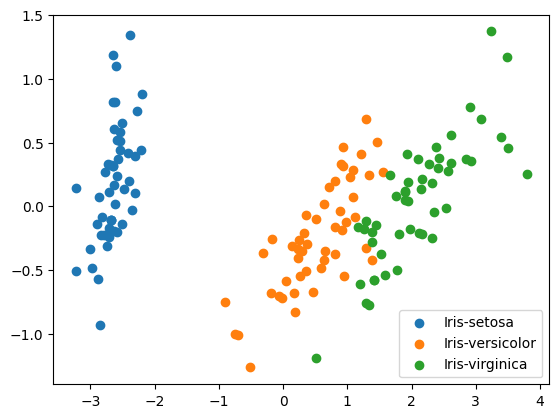

In [63]:
import matplotlib.pyplot as plt # Please check tutorial 2 for details.
groups = iris.groupby("class") #将 iris 数据集按照花的类别分组，得到名为 groups 的DataFrameGroupBy对象

# 对 groups 中的每个分组进行循环遍历，其中 name 变量表示分组的名称，group 变量表示该分组对应的 DataFrame 对象
for name, group in groups:
    plt.scatter(group['z1'],group['z2'], marker="o", label=name)
# group['z1'] 表示该分组中所有数据点在 PCA 转换后的第一维空间的坐标，group['z2'] 表示第二维空间的坐标

plt.legend() # 添加图例，以显示每个分组的标签。
plt.show() # 展示绘制出的散点图。

# Assignment - Due in Week 8


## 1. use f_classif as your evaluation measurement and redo the feature selection in Univariate feature selection. what does "f_classif" represent? Is this a filter model or wrapper model? (10 points). 

## 2. Explain the differences among univariate feature selection, SelectFromModel method, and PCA. (10 points)


## 3. Read documentation of "SequentialFeatureSelector" and use it to select the top TWO features. What is the mechnism of this tool? What are these two optimal features? (40 points)

document: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

## 4. Find a new dataset and use ONE of the templates to do feature selection or reduction. Reduce the data dimension to Two. Please scatter plot your optimal feature set and interpret. (40 points)


## Download your jupyter notebook as HTML and upload to Canvas (including your name and datetime).

**<font color='blue'>References:</font>**

1. Sklearn library. https://scikit-learn.org/stable/
2. Matplotlib. https://matplotlib.org/
3. Seaborn. https://seaborn.pydata.org/

# 1.

In [64]:
my_model_2=SelectKBest(f_classif, k=2)  # Change the chi2 to "f_classif"

In [65]:
X_new=my_model_2.fit_transform(X,y) 

In [66]:
my_model_2.get_support()

array([False, False,  True,  True])

"f_classif": ANOVA F-value between label/feature for classification tasks. It's used to capture the linear relationship between each feature and the (discrete variable) label. It's a filter model used in the Univariate Feature Selection method to select the most significant features for classification tasks.

# 2.

1. Univariate feature selection selects the best features by means of a statistical test based on a single variable. This method calculates a statistical indicator for each variable separately and then determines which indicators are important based on that indicator and eliminates those that are not, without considering the interrelationships between the features. The advantage is that the calculation is efficient, but the disadvantage is that the combination of features is ignored.

单变量特征选择通过基于单个变量的统计检验来选择最佳特征。此方法分别计算每个变量的统计指标，然后根据该指标确定哪些指标重要，并消除那些不重要的指标，而不考虑特征之间的相互关系。优点是计算高效，但缺点是忽略了特征的组合。

2. SelectFromModel is used to select features for machine learning model estimation. It selects features based on importance weights, retaining elements that are more important than or equal to the threshold, while other elements are discarded. 

SelectFromModel 用于选择用于机器学习模型估计的特征。它根据重要性权重选择要素，保留比阈值更重要或等于阈值的元素，而丢弃其他元素。

3. PCA reduces the dimensionality of the data by mapping high-dimensional data to a low-dimensional space by some kind of linear projection and expects the variance of the data to be greatest in the projected dimension (maximum variance theory), and retains the original data point characteristics so that the mapped sample has maximum dispersion.

PCA通过某种线性投影将高维数据映射到低维空间来降低数据的维数，并期望数据在投影维数中的方差最大（最大方差理论），并保留原始数据点特征，使映射的样本具有最大的离散度。

Therefore, the choice of these three methods depends on the specific application scenarios and requirements. If an interpretable subset of features is needed, Univariate Feature Selection and SelectFromModel can be selected, while PCA can be chosen if only dimensionality reduction is required and interpretability is not necessary.

因此，这三种方法的选择取决于具体的应用场景和要求。如果需要可解释的特征子集，则可以选择单变量特征选择和 SelectFromModel，而如果只需要降维且不需要可解释性，则可以选择 PCA。

# 3.

In [67]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=3)

In [69]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=2)

In [70]:
sfs.fit(X, y)


SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=3),
                          n_features_to_select=2)

In [71]:
optimal_features=sfs.get_support(indices=True)

In [72]:
print(optimal_features)

[0 3]


SFS is a feature selection method based on a greedy mechanism. The feature subset X starts with the empty set and chooses one feature x at a time to join the feature subset X such that the feature function J( X) is optimal. That is, one feature is selected each time that makes the evaluation function take the optimal value to join, which is in fact a simple greedy algorithm.


Here KNeighborsClassifier (n_neighbors=3) is used as the base model and the best two features are the 1rd and 4th features, namely sepal length and petal width.

SFS是一种基于贪婪机制的特征选择方法。特征子集 X 从空集开始，一次选择一个特征 x 来连接特征子集 X，从而使特征函数 J（ X） 是最优的。也就是说，每次选择一个特征，使评估函数取最优值进行连接，这实际上是一个简单的贪婪算法。 

这里以KNeighborsClassifier（n_neighbors=3）作为基本模型，最好的两个特征是第1和第4个特征，即萼片长度和花瓣宽度。

# revision重写的方法

其实没懂，再看看

In [73]:
# 这段代码使用了 scikit-learn 中的 SequentialFeatureSelector 工具来进行特征选择。
# 首先，导入了 SequentialFeatureSelector 和 KNeighborsClassifier 类，并创建了一个邻居数为 3 的 KNN 分类器对象。
# 接下来，创建了一个 SequentialFeatureSelector 对象 sfs，并将 KNN 分类器对象 knn 和需要选择的特征数 n_features_to_select=2 作为参数传入。
# 然后，使用 sfs 对象的 fit 方法来训练特征选择器，以找到最佳的特征子集。训练完成后，调用 sfs 对象的 get_support 来获取最佳特征子集的信息，并将其存储在一个布尔数组中
# 最后，使用 sfs 对象的 transform 方法对原始特征矩阵进行转换，只保留最佳特征子集所对应的列，并将转换后的特征矩阵存储在 X_selected 变量中

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

# 定义一个K最近邻（K-Nearest Neighbors，KNN）分类器对象，用于进行特征选择。将设置邻居数为3。
# 邻居数n_neighbors是K最近邻（K-Nearest Neighbors，KNN）分类器中的一个参数，表示在预测分类时，将考虑的最近邻居的数量
knn = KNeighborsClassifier(n_neighbors=3)


# SequentialFeatureSelector工具需要一个可以评估每个特征子集的评估器（estimator）。在这个例子中，我们选择了KNN分类器作为评估器，以评估每个特征子集的性能。
# SequentialFeatureSelector将尝试每个可能的特征子集，并在KNN分类器上评估每个子集的性能，然后选择最佳的子集。

# 除了KNN分类器之外，SequentialFeatureSelector工具还可以使用其他评估器，例如决策树分类器、支持向量机分类器等。
# 只要评估器实现了scikit-learn的分类器接口，都可以作为SequentialFeatureSelector的评估器。

# 而设置n_features_to_select=2，则表示我们希望选择2个最佳特征。SequentialFeatureSelector工具将在KNN分类器上评估每个特征子集的性能，直到选择出最佳的2个特征。

# 需要注意的是，KNN分类器和SequentialFeatureSelector是两个不同的工具，它们各自的作用不同，但是在本例中，我们将它们结合使用，以进行特征选择。

sfs = SequentialFeatureSelector(knn, n_features_to_select=2)


# 在机器学习中，fit是一个常用的方法，通常用于对模型进行训练。
# 在训练模型时，我们将训练数据输入模型中，并使用fit方法对模型进行拟合（fitting）。
# 该方法将使用给定的训练数据集对模型进行参数调整，使其能够对训练数据进行最佳拟合。
# 
# 对于不同的模型和算法，fit方法的实现方式可能有所不同。
# 例如，在scikit-learn中，大多数模型的fit方法都具有相似的参数和接口，但具体实现方式可能有所不同。
# 
# 在特征选择中，fit方法的作用是使用给定的特征矩阵和标签向量来训练特征选择器，以找到最佳的特征子集。
# 在fit方法执行后，我们可以使用其他方法（如get_support和transform）来获取选择的最佳特征子集并对数据集进行转换。

sfs.fit(X, y)


# 使用SequentialFeatureSelector工具获取了最佳特征子集，并将其存储在optimal_features变量中
# 调用了sfs对象的get_support方法来获取最佳特征子集。
# SequentialFeatureSelector工具在进行特征选择时，会使用一种特征选择算法，根据算法的评价指标（如准确率、F1-score等）对每个特征进行评估和排序，然后选择排名靠前的特征作为最佳特征子集。
# get_support方法的作用就是获取这个最佳特征子集的信息，即哪些特征被选择
# 该方法返回一个布尔数组，其长度与原始特征矩阵的列数相同，对应于每个特征是否被选择为最佳特征子集。被选择的特征对应的元素为True，未被选择的特征对应的元素为False。
# 我们可以根据这个布尔数组来获取最佳特征子集，或者将其用于其他任务，如可视化或特征重要性评估。

# 我们使用 get_support 方法并带有 indices=True 参数，以获取被选择的特征的索引，返回一个整数列表。这个整数列表对应于原始特征矩阵 X 中被选择特征的列索引。
# 例如，如果 selected_features_indices 是 [0, 2]，则原始特征矩阵 X 中的第一列和第三列被选择。

mask = sfs.get_support(indices=True)

print('Selected features:', mask)

Selected features: [0 3]


# 4.

In [74]:
# Feature dimensionality reduction on the Wine dataset using PCA. 
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
wine = load_wine()

In [75]:
X = wine.data
y = wine.target

In [76]:
# Reduce the data dimension to Two.
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

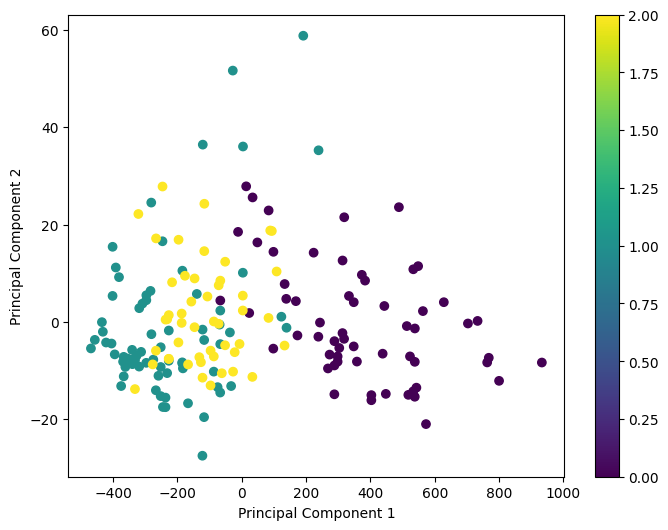

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

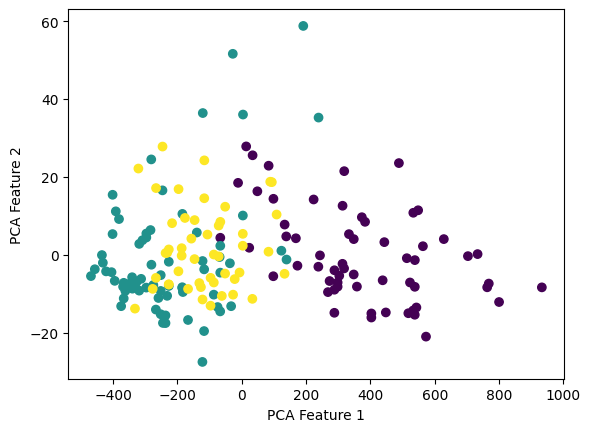

In [78]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载数据集
wine = load_wine()

# 数据降维
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(wine.data)

# 绘制散点图
# c=wine.target表示使用葡萄酒数据集的标签（即wine.target）作为样本点的颜色。这意味着在绘制散点图时，属于同一类别的样本点将会具有相同的颜色。
# wine.target是葡萄酒数据集中的一个属性，它包含每个样本所属的类别，共有三个类别：0、1、2。因此，在散点图中，不同颜色的点代表不同类别的样本
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=wine.target)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

The scatter plot shows the distribution of the data in the 2 principal component space. We can see that the different wine varieties form different clusters in the principal component space, indicating that PCA retains as much information as possible from the original data when reducing the data to 2 principal components. It can be seen that the use of PCA in the 2 principal component space allows a good distinction between different wine varieties.

散点图显示了数据在 2 个主成分空间中的分布。我们可以看到，不同的葡萄酒品种在主成分空间中形成了不同的聚类，这表明PCA将数据减少到2个主成分时，尽可能多地保留原始数据中的信息。可以看出，在2个主成分空间中使用PCA可以很好地区分不同的葡萄酒品种。